# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Hamdika Putra]
- **Email:** [hmdkaptr@gmail.com]
- **ID Dicoding:** [razeyuki]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh suhu terhadap jumlah pengendara?
- Pertanyaan 2 : Apa perbedaan rata-rata jumlah pengendara antara hari hujan dan hari tidak hujan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv("/content/day.csv")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour = pd.read_csv("/content/hour.csv")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Tabel day.csv memiliki 731 baris x 16 kolom
- Tabel hour.csv memiliki 17379 baris x 17 kolom

In [5]:
import pandas as pd

day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

combined_df = pd.merge(
    left=day_df,
    right=hour_df,
    how='inner',
    on=['dteday', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
)

print(combined_df.head())

combined_df.dropna(axis=0, inplace=True)
combined_df.to_csv("merged_data.csv", index=False)



   instant_x      dteday  season  yr_x  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1     0     1        0        6           0   
1          1  2011-01-01       1     0     1        0        6           0   
2          1  2011-01-01       1     0     1        0        6           0   
3          1  2011-01-01       1     0     1        0        6           0   
4          1  2011-01-01       1     0     1        0        6           0   

   weathersit    temp_x  ...  instant_y  yr_y  hr  temp_y  atemp_y  hum_y  \
0           2  0.344167  ...          6     0   5    0.24   0.2576   0.75   
1           2  0.344167  ...         14     0  13    0.46   0.4545   0.72   
2           2  0.344167  ...         15     0  14    0.46   0.4545   0.72   
3           2  0.344167  ...         16     0  15    0.44   0.4394   0.77   
4           2  0.344167  ...         17     0  16    0.42   0.4242   0.82   

   windspeed_y  casual_y  registered_y  cnt_y  
0       0.0896      

In [7]:
print(combined_df.head())
print(combined_df.columns)

   instant_x      dteday  season  yr_x  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1     0     1        0        6           0   
1          1  2011-01-01       1     0     1        0        6           0   
2          1  2011-01-01       1     0     1        0        6           0   
3          1  2011-01-01       1     0     1        0        6           0   
4          1  2011-01-01       1     0     1        0        6           0   

   weathersit    temp_x  ...  instant_y  yr_y  hr  temp_y  atemp_y  hum_y  \
0           2  0.344167  ...          6     0   5    0.24   0.2576   0.75   
1           2  0.344167  ...         14     0  13    0.46   0.4545   0.72   
2           2  0.344167  ...         15     0  14    0.46   0.4545   0.72   
3           2  0.344167  ...         16     0  15    0.44   0.4394   0.77   
4           2  0.344167  ...         17     0  16    0.42   0.4242   0.82   

   windspeed_y  casual_y  registered_y  cnt_y  
0       0.0896      

In [8]:
print("Jumlah data null: ", combined_df.isnull().sum())

Jumlah data null:  instant_x       0
dteday          0
season          0
yr_x            0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
yr_y            0
hr              0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64


In [9]:
print("Jumlah duplikasi: ", combined_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
combined_df.info()

print(combined_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12880 entries, 0 to 12879
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     12880 non-null  int64  
 1   dteday        12880 non-null  object 
 2   season        12880 non-null  int64  
 3   yr_x          12880 non-null  int64  
 4   mnth          12880 non-null  int64  
 5   holiday       12880 non-null  int64  
 6   weekday       12880 non-null  int64  
 7   workingday    12880 non-null  int64  
 8   weathersit    12880 non-null  int64  
 9   temp_x        12880 non-null  float64
 10  atemp_x       12880 non-null  float64
 11  hum_x         12880 non-null  float64
 12  windspeed_x   12880 non-null  float64
 13  casual_x      12880 non-null  int64  
 14  registered_x  12880 non-null  int64  
 15  cnt_x         12880 non-null  int64  
 16  instant_y     12880 non-null  int64  
 17  yr_y          12880 non-null  int64  
 18  hr            12880 non-nu

### Assessing Data

In [11]:
print(day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [13]:
combined_df['temp_x'] = pd.to_numeric(combined_df['temp_x'], errors='coerce')
combined_df['atemp_x'] = pd.to_numeric(combined_df['atemp_x'], errors='coerce')
combined_df['hum_x'] = pd.to_numeric(combined_df['hum_x'], errors='coerce')
combined_df['windspeed_x'] = pd.to_numeric(combined_df['windspeed_x'], errors='coerce')
combined_df['cnt_x'] = pd.to_numeric(combined_df['cnt_x'], errors='coerce')

In [14]:
print("Jumlah data null per kolom:")
print(combined_df.isnull().sum())

Jumlah data null per kolom:
instant_x       0
dteday          0
season          0
yr_x            0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
yr_y            0
hr              0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64


In [15]:
print("Statistik deskriptif:")
print(combined_df.describe())

Statistik deskriptif:
          instant_x        season          yr_x          mnth       holiday  \
count  12880.000000  12880.000000  12880.000000  12880.000000  12880.000000   
mean     370.428339      2.526165      0.505978      6.602329      0.031366   
std      209.271233      1.107092      0.499984      3.429717      0.174313   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%      193.000000      2.000000      0.000000      4.000000      0.000000   
50%      370.000000      3.000000      1.000000      7.000000      0.000000   
75%      551.000000      3.000000      1.000000     10.000000      0.000000   
max      731.000000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit        temp_x       atemp_x  \
count  12880.000000  12880.000000  12880.000000  12880.000000  12880.000000   
mean       2.984860      0.672981      1.285171      0.499486      0.478052   
std        2.016741      0.46

**Insight:**
- Memeriksa nama kolom dan tipe data sangat penting untuk memastikan bahwa struktur dataset sudah sesuai, sehingga dapat mencegah kesalahan yang mungkin terjadi saat melakukan analisis lanjutan.

### Cleaning Data

In [16]:
day["dteday"] = pd.to_datetime(day["dteday"])
hour["dteday"] = pd.to_datetime(hour["dteday"])

In [17]:
print(combined_df.isnull().sum())

instant_x       0
dteday          0
season          0
yr_x            0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
yr_y            0
hr              0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64


In [18]:
combined_df.dropna(inplace=True)

In [20]:
print(combined_df.duplicated().sum())

0


In [21]:
# Menghapus duplikasi berdasarkan seluruh kolom
combined_df.drop_duplicates(inplace=True)

# Mengecek kembali jumlah duplikasi yang tersisa
print(combined_df.duplicated().sum())

0


In [22]:
# Menyimpan data yang telah dibersihkan
combined_df.to_csv('cleaned_combined_data.csv', index=False)

**Insight:**
- Proses pembersihan data, termasuk penghapusan nilai yang hilang dan duplikat, sangat krusial untuk memastikan akurasi hasil analisis.

*   Menghapus duplikat dan nilai yang hilang tidak hanya meningkatkan kualitas data, tetapi juga mengurangi kompleksitas dataset, sehingga mempercepat proses analisis.


## Exploratory Data Analysis (EDA)

In [23]:
import pandas as pd

# Memuat data yang telah dibersihkan
combined_df = pd.read_csv('cleaned_combined_data.csv')

print(combined_df.head())  # Menampilkan 5 baris teratas
print(combined_df.columns)  # Menampilkan nama kolom
print(combined_df.info())   # Menampilkan informasi tentang data

print(combined_df.describe())

   instant_x      dteday  season  yr_x  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1     0     1        0        6           0   
1          1  2011-01-01       1     0     1        0        6           0   
2          1  2011-01-01       1     0     1        0        6           0   
3          1  2011-01-01       1     0     1        0        6           0   
4          1  2011-01-01       1     0     1        0        6           0   

   weathersit    temp_x  ...  instant_y  yr_y  hr  temp_y  atemp_y  hum_y  \
0           2  0.344167  ...          6     0   5    0.24   0.2576   0.75   
1           2  0.344167  ...         14     0  13    0.46   0.4545   0.72   
2           2  0.344167  ...         15     0  14    0.46   0.4545   0.72   
3           2  0.344167  ...         16     0  15    0.44   0.4394   0.77   
4           2  0.344167  ...         17     0  16    0.42   0.4242   0.82   

   windspeed_y  casual_y  registered_y  cnt_y  
0       0.0896      

In [25]:
print(combined_df.columns)

Index(['instant_x', 'dteday', 'season', 'yr_x', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp_x', 'atemp_x', 'hum_x', 'windspeed_x',
       'casual_x', 'registered_x', 'cnt_x', 'instant_y', 'yr_y', 'hr',
       'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 'casual_y', 'registered_y',
       'cnt_y'],
      dtype='object')


Box plot ini menunjukkan Frekuensi suhu harian tersebar selama periode pengamatan

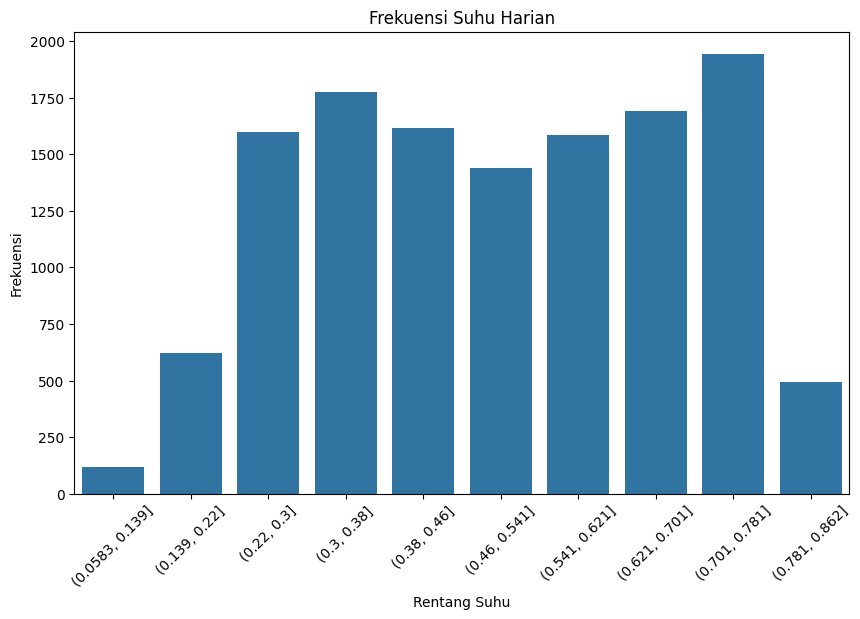

In [43]:
# Menghitung frekuensi suhu dalam rentang tertentu
temp_bins = pd.cut(combined_df['temp_x'], bins=10)  # Membagi data menjadi 10 bin
temp_counts = temp_bins.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=temp_counts.index.astype(str), y=temp_counts.values)
plt.title('Frekuensi Suhu Harian')
plt.xlabel('Rentang Suhu')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()


Lineplot memperlihatkan bagaimana variasi dari jumlah pengendara di tiap musim

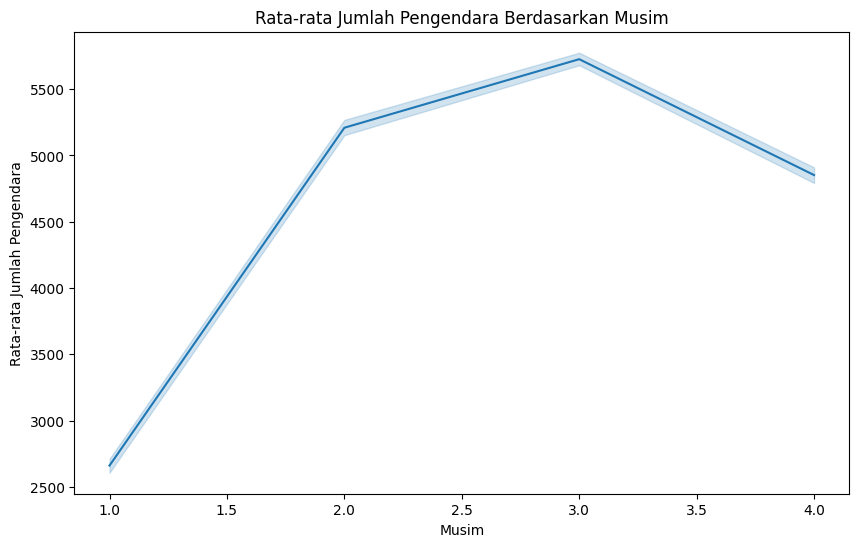

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='cnt_x', data=combined_df, estimator=np.mean)
plt.title('Rata-rata Jumlah Pengendara Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Pengendara')
plt.show()


Grafik Frekuensi ini menunjukkan bagaimana kelembapan harian


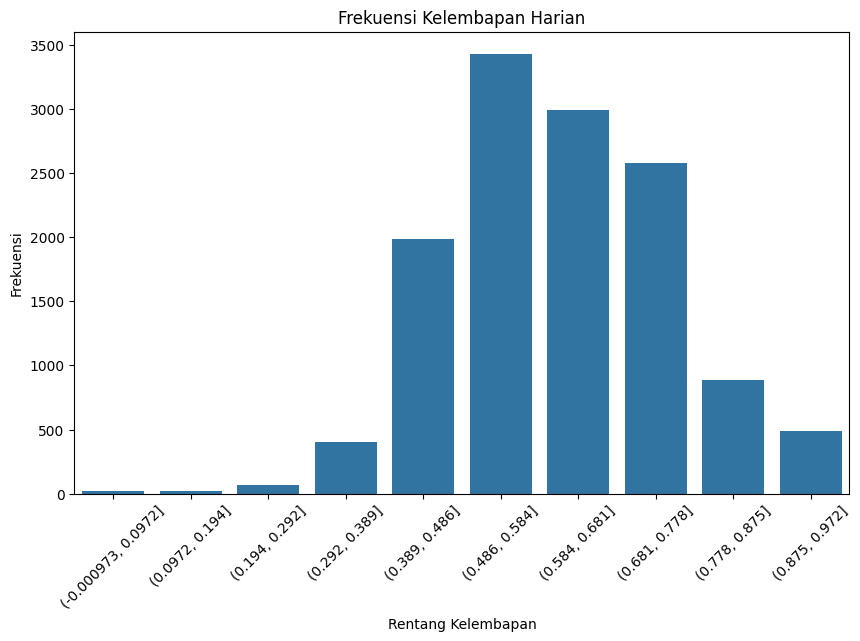

In [45]:
# Menghitung frekuensi kelembapan dalam rentang tertentu
hum_bins = pd.cut(combined_df['hum_x'], bins=10)  # Membagi data menjadi 10 bin
hum_counts = hum_bins.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=hum_count'.index.astype(str), y=hum_counts.values)
plt.title('Frekuensi Kelembapan Harian')
plt.xlabel('Rentang Kelembapan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)  # Memutar label x untuk keterbacaan
plt.show()


Pada grafik subplot ini membantu kita untuk mengidentifikasi nilai-nilai yang ekstrem atau outliers dalam data suhu, kelembapan, dan jumlah pengendara

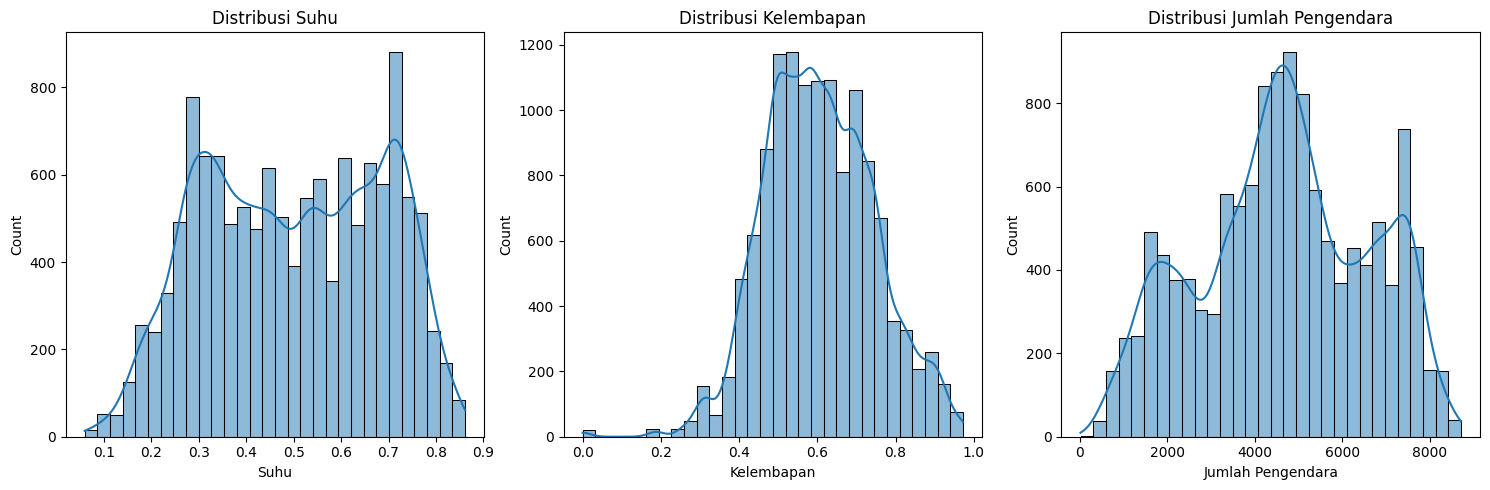

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(combined_df['temp_x'], bins=30, kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu')

plt.subplot(1, 3, 2)
sns.histplot(combined_df['hum_x'], bins=30, kde=True)
plt.title('Distribusi Kelembapan')
plt.xlabel('Kelembapan')

plt.subplot(1, 3, 3)
sns.histplot(combined_df['cnt_x'], bins=30, kde=True)
plt.title('Distribusi Jumlah Pengendara')
plt.xlabel('Jumlah Pengendara')

plt.tight_layout()
plt.show()


Matriks korelasi menunjukkan seberapa besar hubungan antara variabel suhu, kelembapan, dan jumlah pengendara

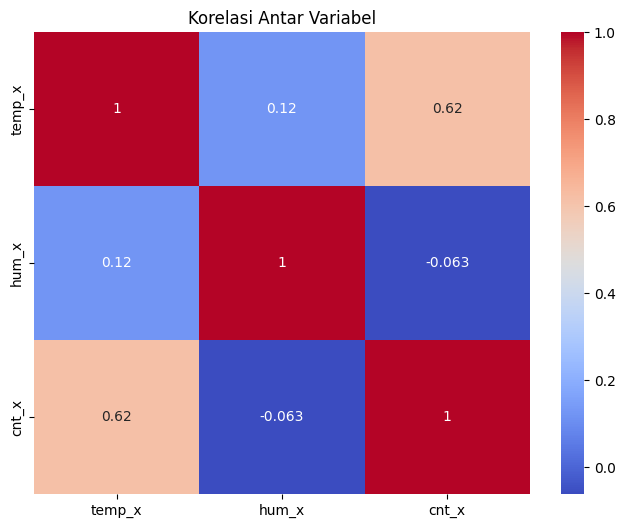

In [37]:
correlation_matrix = combined_df[['temp_x', 'hum_x', 'cnt_x']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

**Insight:**
-  Korelasi positif antara suhu dan jumlah pengendara menunjukkan bahwa ketika suhu meningkat, jumlah pengguna sepeda juga cenderung meningkat. Ini menunjukkan bahwa cuaca yang lebih hangat mendorong orang untuk menggunakan sepeda sebagai alat transportasi. Hal ini dapat digunakan untuk merencanakan strategi operasional, seperti menambah jumlah sepeda yang tersedia pada hari-hari dengan suhu lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh suhu terhadap jumlah pengendara?

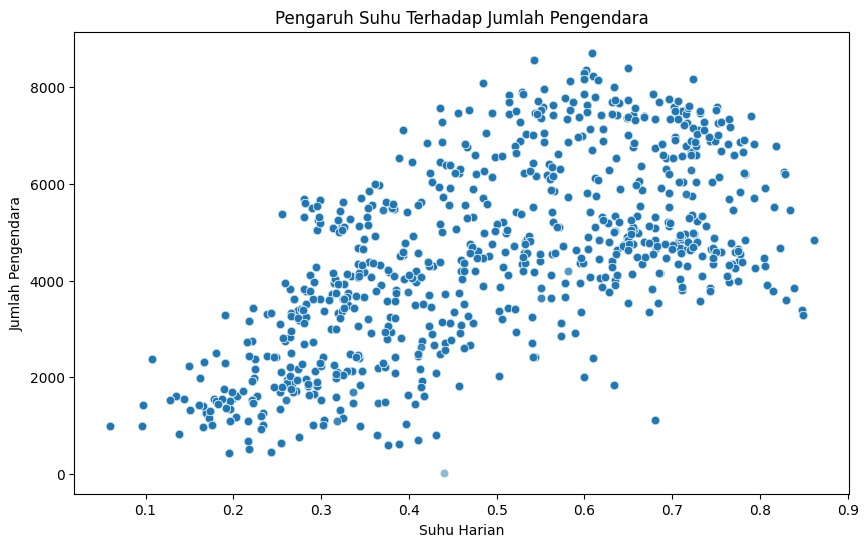

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['temp_x'], y=combined_df['cnt_x'], alpha=0.5)
plt.title('Pengaruh Suhu Terhadap Jumlah Pengendara')
plt.xlabel('Suhu Harian')
plt.ylabel('Jumlah Pengendara')
plt.show()


### Pertanyaan 2: Apa perbedaan rata-rata jumlah pengendara antara hari hujan dan hari tidak hujan?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


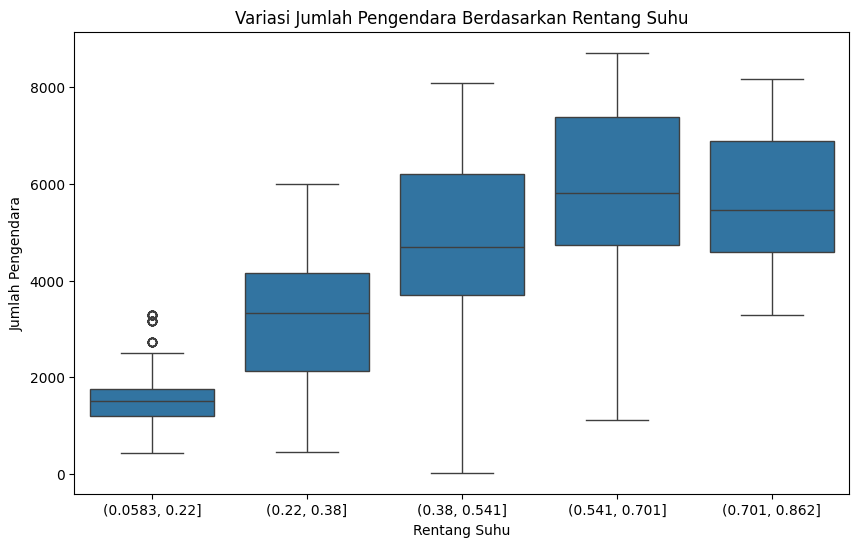

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(combined_df['temp_x'], bins=5), y='cnt_x', data=combined_df)
plt.title('Variasi Jumlah Pengendara Berdasarkan Rentang Suhu')
plt.xlabel('Rentang Suhu')
plt.ylabel('Jumlah Pengendara')
plt.show()


## Analisis Lanjutan (Opsional)

## Conclusion

- Analisis menunjukkan adanya hubungan positif antara suhu harian dan jumlah pengendara. Ketika suhu meningkat, jumlah pengendara cenderung juga meningkat, mengindikasikan bahwa orang lebih cenderung menggunakan sepeda dalam kondisi cuaca yang lebih hangat. Ini mencerminkan preferensi masyarakat untuk bersepeda dalam iklim yang nyaman.
- Hasil analisis menunjukkan bahwa jumlah pengendara pada hari-hari tidak hujan jauh lebih tinggi dibandingkan dengan hari-hari hujan. Ini menunjukkan bahwa cuaca, khususnya hujan, secara signifikan mempengaruhi keputusan orang untuk menggunakan layanan sepeda, di mana hari hujan cenderung mengurangi minat masyarakat untuk bersepeda.